# Train Data 

Eğitilecek veri setinde kullanılan değerler bir turbofan motora aittir. Turbofan motoru çeşitli komponentleri sahiptir. Bunlardan bazıları: Fan, Alçak Basınç Kompresörü (LPC), Yüksek Basınç Kompresörü (HPC), Alçak Basınç Türbini (LPT) ve Yüksek Basınç Türbini (HPT)

Operasyon sırasında, bileşenlerin her birinde bozulma meydana gelebiliyor. Herhangi bir bileşendeki bozulma seviyesi var olan bozulma eşiğini aşarsa, motorun arızalı olduğu anlaşılır. Motor havada iken bozulmasını istemediğimiz için jet motorları her kalkıştan önce kontrol edilir. Bu uygun maliyetli olmayan bir periyodik bakım şeklidir.

Herhangi olabilecek bir hatayı önceden biliyor olmamız bize oldukça yardımcı olacaktır. Bu da herhangi bir felakete yol açmamasını sağlar. Ancak erken bir uyarı çok eski ve gelenekçiyse (conservative), gereksiz yere para israfına yol açacaktır. Öngörülü bir bakım sisteminin amacı, RUL'u ne çok erken ne de çok geç olacak şekilde mümkün olduğunca doğru bir şekilde tahmin etmektir.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

ham_data = pd.read_csv('train_FD001.txt',sep = ' ', header = None)
ham_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [2]:
ham_data = ham_data.drop([26,27], axis = 'columns')

In [3]:
ham_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13',
                    'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20','SensorMeasure21']
ham_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [4]:
ham_data[ham_data['ID'] == 1]

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [5]:
EOL= []
for sl_no in ham_data['ID']:
    EOL.append( ((ham_data[ham_data['ID'] == sl_no]["Cycle"]).values)[-1])

In [6]:
EOL

[192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192,
 192

In [7]:
ham_data["EOL"]=EOL

In [8]:
ham_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


# Etiketleri tanımlama

* LR <= 0.6 - İyi Kondisyon
* 0.6 < LR <= 0.8 Makul Kondisyon
* 0.8 < LR Tehlikeli Kondisyon

In [9]:
# Hesaplama "LR"
ham_data["LR"] = ham_data["Cycle"].div(ham_data["EOL"])

In [10]:
ham_data 
#LR'yi hesapladıktan sonra datamızda görmek için bu kodu çalıştırdım ve en son kısımda LR olduğunu gördüm.

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL,LR
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,0.005208
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,0.010417
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,0.015625
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,0.020833
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,0.980000
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,0.985000
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,0.990000
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,0.995000


In [11]:
# Drop ID and EOL 
ham_data = ham_data.drop(columns=['ID','EOL'])

In [12]:
labels = []
for i in range (0,len(ham_data)):
    if np.array(ham_data["LR"])[i] <=0.6:
        labels.append(0)
    elif np.array(ham_data["LR"])[i] <=0.8:
        labels.append(1)
    else:
        labels.append(2)
        
ham_data["labels"] = labels
ham_data = ham_data.drop(columns=["LR"])
ham_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,2
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2


# Training Datayı Oluşturma

In [13]:
ham_data.to_csv('Training_1_all_features.csv', index = None) #4 Datayıda kaydettik.

# Trainlenmiş bütün data setlerinin içe aktarımı

In [4]:
df1 = pd.read_csv('Training_1_all_features.csv')
df2 = pd.read_csv('Training_2_all_features.csv')
df3 = pd.read_csv('Training_3_all_features.csv')
df4 = pd.read_csv('Training_4_all_features.csv')

In [5]:
df = pd.concat([df1,df2,df3,df4]) 

In [6]:
df #görsel olarak dataya göz atmak için yazdık.

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,2
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2


In [7]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)


ModuleNotFoundError: No module named 'sklearn'

# Random Forest model Training etme

In [19]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

# Doğrulama Kümesindeki Performansı

In [1]:
y_pred_RF = RF.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test,y_pred_RF, normalize = 'true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True, cmap=colormap)

accuracy_score(y_test, y_pred_RF)

NameError: name 'RF' is not defined

In [21]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Eğitim setindeki Performans

1.0

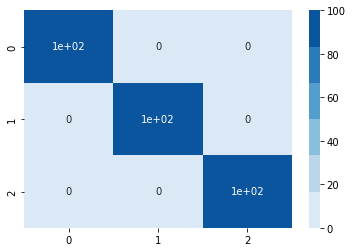

In [22]:
y_pred_RF = RF.predict(X_train)

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_RF, normalize = 'true')*100)
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True, cmap=colormap)

accuracy_score(y_train, y_pred_RF) #veya RF.score(X_train, y_train)

# Hiperparametre optimizasyonu için çapraz doğrulama ile rastgele arama

Önceki yapmış olduğumuz train dataya çok uyuyor, Bu yüzden bazı hiper parametrelere ayar yapmamız gerekiyor.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Random Forest içerisindeki ağaç sayısı
n_estimators = [200,400,300]
# Ağaçtaki maksimum seviye sayısı
max_depth = [10,20,30]
# Her ağaca verilen maksimum örnek sayısı
max_samples = [0.2,0.3,0.4]
# rastgele bir ızgara oluşturduk.
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_samples': max_samples}
print(random_grid)

{'n_estimators': [200, 400, 300], 'max_depth': [10, 20, 30], 'max_samples': [0.2, 0.3, 0.4]}


In [24]:
#En iyi hiperparametreyi bulmak/aramak için random gridi (rastgele ızgarayı) kullandık.
#Öncelikle base modeli oluşturalım
rf = RandomForestClassifier()
#3 kat çapraz doğrulama kullanarak parametrelerin rastgele aranması
# 100 farklı kombinasyon arama, ve mevcut tüm çekirdeklerde kullanır.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, n_jobs = -1)
# Rastgele arama modelini uy
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_samples': [0.2, 0.3, 0.4],
                                        'n_estimators': [200, 400, 300]})

In [25]:
rf_random.best_params_

{'n_estimators': 300, 'max_samples': 0.4, 'max_depth': 30}

In [26]:
rf_random.best_score_

0.9865357945900822

0.9974554707379135

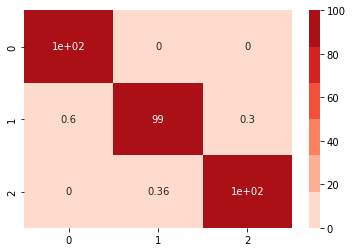

In [28]:
RF_randSer = RandomForestClassifier(n_estimators = 400, max_samples = 0.3, max_depth = 20)
RF_randSer.fit(X_train, y_train)
y_pred_RF = RF_randSer.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize = 'true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot = True, cmap = colormap)
accuracy_score(y_test, y_pred_RF)

# Test Data

Test dataları train datalarına tek bir farklılık harici benzerler. Train verileri için, veriler her motor için arızalanana kadar mevcuttur, test datası için ise keyfi döngü sayısı mevcuttur. 
Verilen test datasında, amacımız RUL(Kalan Faydalı Ömür (RUL), bir öğenin, bileşenin veya sistemin, değiştirmeyi garanti etmeden önce amaçlanan amacına uygun olarak çalışabileceği tahmin edilen kalan yıl sayısının öznel bir tahminidir.) değerlerini tahmin etmektir. Test datası için, doğru RUL değerleri mevcuttur böylelikle kendi tahmin algoritmamızın performansını karşılaştırabiliriz.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

Bize verilen test datası ile oluşturduğumuz train datası aynı formda değil, bu sebeple bizim iki dosyayıda aynı formata çevirmemiz gerekiyor.

In [30]:
ham_data = pd.read_csv('test_FD001.txt', sep = ' ', header = None)
ham_data = ham_data.drop([26,27], axis = 'columns')
ham_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13',
                    'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20','SensorMeasure21']

In [33]:
given_no_of_cycles = []
for i in range (1, len(ham_data['ID'].unique())+1):
    given_no_of_cycles.append(len(ham_data[ham_data['ID']==i]))
    print(len(ham_data[ham_data['ID']==i]))
given_no_of_cycles = np.array(given_no_of_cycles).reshape([cycle_ran_after.shape[0],1])

31
49
126
106
98
105
160
166
55
192
83
217
195
46
76
113
165
133
135
184
148
39
130
186
48
76
140
158
171
143
196
145
50
203
198
126
121
125
37
133
123
156
172
54
152
146
73
78
303
74
144
189
164
121
113
136
160
176
94
147
159
232
155
168
71
147
71
187
54
152
68
131
112
137
88
205
162
72
101
133
213
162
73
172
34
110
56
68
177
146
234
150
244
133
89
97
134
121
97
198


In [32]:
cycle_ran_after = pd.read_csv('RUL_FD001.txt', sep = ' ', header = None)
cycle_ran_after = cycle_ran_after.drop([1], axis = 'columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[112],
       [ 98],
       [ 69],
       [ 82],
       [ 91],
       [ 93],
       [ 91],
       [ 95],
       [111],
       [ 96],
       [ 97],
       [124],
       [ 95],
       [107],
       [ 83],
       [ 84],
       [ 50],
       [ 28],
       [ 87],
       [ 16],
       [ 57],
       [111],
       [113],
       [ 20],
       [145],
       [119],
       [ 66],
       [ 97],
       [ 90],
       [115],
       [  8],
       [ 48],
       [106],
       [  7],
       [ 11],
       [ 19],
       [ 21],
       [ 50],
       [142],
       [ 28],
       [ 18],
       [ 10],
       [ 59],
       [109],
       [114],
       [ 47],
       [135],
       [ 92],
       [ 21],
       [ 79],
       [114],
       [ 29],
       [ 26],
       [ 97],
       [137],
       [ 15],
       [103],
       [ 37],
       [114],
       [100],
       [ 21],
       [ 54],
       [ 72],
       [ 28],
       [128],
       [ 14],
       [ 77],
       [  8],
       [121],
       [ 94],
       [118],
      

Buradaki çıktıda örneğin; motor 1 için 31 cycles(çevrim) mevcuttur. Motor 2 için 49 cycles mevcuttur. Mevcut verileri kullanarak amacımız her motor için RUL'u tahmin etmektir.

In [34]:
len(ham_data['ID'].unique())

100

Test datasında Motor 1 in RUL Değeri 112, 31.cycles'tan (döngüden) sonra 112 döngüde başarısız olduğu anlamına gelir. Yani Motor 1 arızalanmadan önce (31+112) cycles (devir) çalıştı. Aynı şekilde Motor 2'de 49.cycles'tan sonra 98.cycles'ta başarısız oldu. Yani Motor 2 arızalanmadan önce toplamda (49+98) cycles (devir) çalışmıştır. Aynı hesaplamalar diğer test datası içerisindeki motorlar içinde geçerlidir.

given_no_of_cycles'tan gelen veriler
Engine 1 :31
Engine 2 :49

cycle_ran_after'dan gelen veriler
Engine 1 :[112]
Engine 2 :[98]

# EOL Sütununu Yapma

Ömrünün sona ermesi anlamına gelen EOL, yazılım geliştiriciler ve bilgisayar donanımı üreticileri tarafından kullanım ömrünün sonuna gelmiş bir ürünü tanımlamak için kullanılan bir etikettir.

In [35]:
EOL = []
i = 0
for i in ham_data['ID']:
    EOL.append(given_no_of_cycles[i-1]+cycle_ran_after[i-1])
EOL = np.array(EOL).reshape([len(EOL),1])

In [36]:
EOL.shape

(13096, 1)

In [37]:
#EOL sütununu 'Ham_data' dosyamıza ekliyoruz.
ham_data['EOL'] = EOL
ham_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,218
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,218
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,218
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,218


In [38]:
#LR değerini cycle'ı EOL'e bölerek buluyoruz (Cycle/EOL)
ham_data["LR"] = ham_data["Cycle"].div(ham_data["EOL"]) 
# ID ve EOL'u Dropluyoruz. (Spesifik kolon veya sütunu kaldırıyoruz.)
ham_data = ham_data.drop(columns = ['ID','EOL'])
ham_data


,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,LR
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0.006993
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0.013986
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0.020979
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0.027972
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0.034965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0.889908
13092,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0.894495
13093,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0.899083
13094,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0.903670


In [39]:
labels=[]
for i in range(0,len(ham_data)):
    if np.array(ham_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(ham_data["LR"])[i] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)
        
ham_data["labels"] = labels
ham_data = ham_data.drop(columns=["LR"])
ham_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,2
13092,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,2
13093,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,2
13094,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,2


In [40]:
ham_data.to_csv('Test_classification_4.csv', index=None)

# Verilen test veri kümesi üzerinde test etme

In [41]:
df1 = pd.read_csv('Test_classification_1.csv')
df2 = pd.read_csv('Test_classification_2.csv')
df3 = pd.read_csv('Test_classification_3.csv')
df4 = pd.read_csv('Test_classification_4.csv')

test_df = pd.concat([df1,df2,df3,df4])

X_test = test_df.iloc[:,0:-1]
y_test = test_df.iloc[:,-1]

0.9121869273060477

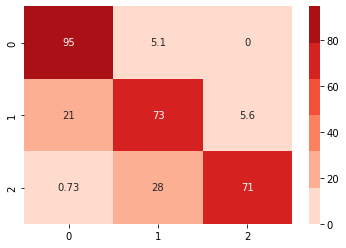

In [42]:
y_pred_RF = RF_randSer.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize = 'true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot = True, cmap = colormap)

accuracy_score(y_test, y_pred_RF)